<a href="https://colab.research.google.com/github/AntonLedyaev/numeric_methods/blob/main/approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##Ледяев Антон, 19.Б02-пу



In [ ]:
%matplotlib
import math as m
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: agg


###Функция

In [ ]:
n = 5
degree = 3

In [ ]:
def f(x):
    return np.tan(x) - np.cos(x) + 0.1

In [ ]:
a = -np.pi/2+0.1
b = np.pi/2-0.1
z = (b - a)/n

In [ ]:
x_dots = np.linspace(a, b, num = 100)
y = [f(i) for i in x_dots]

In [ ]:
even_x = np.linspace(a, b, n)
even_y = [f(i) for i in even_x]

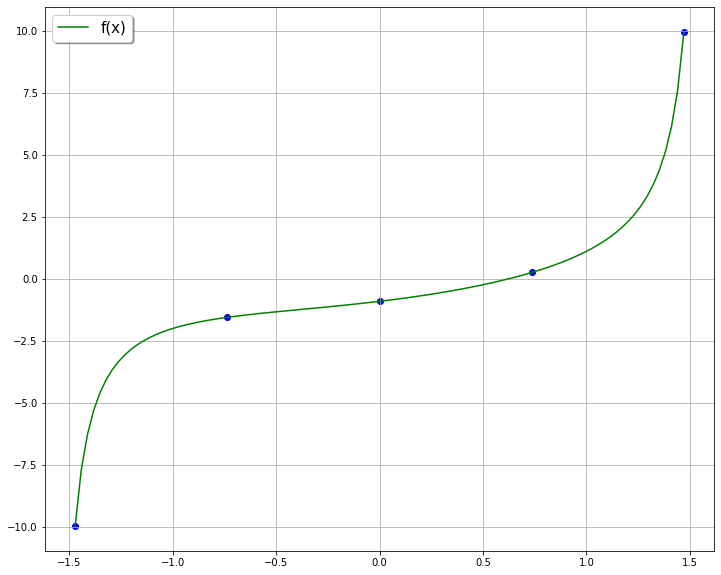

In [ ]:
fig, ax = plt.subplots()
ax.scatter(even_x, even_y, c = 'b')
ax.plot(x_dots, y, c = 'green', label = 'f(x)')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 10)

In [ ]:
Q = np.vander(even_x, degree + 1, increasing = True)
H = np.matmul(Q.T, Q)
b = np.matmul(Q.T, even_y)
a = linalg.solve(H, b)

In [ ]:
def polynomial(x, coefs, k):
    result = 0
    j = 0
    for i in coefs:
        result += (x**j)*i
        j+=1
    return result

In [ ]:
polynomial_y = [polynomial(i, a, degree) for i in x_dots]

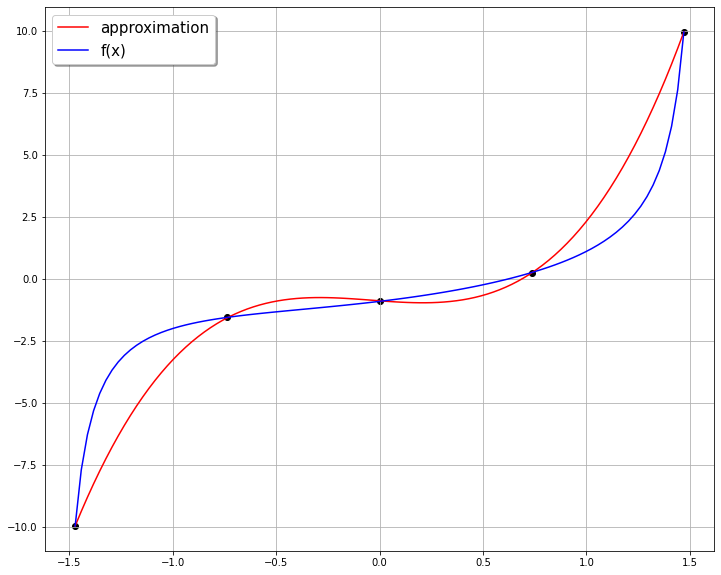

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_dots, polynomial_y,c = 'red', label = 'approximation')
ax.plot(x_dots, y, c = 'blue', label = 'f(x)')
ax.scatter(even_x, even_y, c = 'black')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 10)

In [ ]:
def q_i(x, i):
    if i == 0:
        return 1
    elif i == 1: 
        sum = 0
        for x_i in even_x:
            sum += x_i
        return x - 1/n*(sum)
    else: 
        num_a, den_a, num_b, den_b = 0, 0, 0, 0
        for x_i in even_x:
            num_a += x_i*(q_i(x_i, i-1)**2)
            den_a += q_i(x_i, i-1)**2
            num_b += x_i*q_i(x_i, i-1)*q_i(x_i, i-2)
            den_b += q_i(x_i, i-2)**2
            
        alpha_j_1 = num_a/den_a
        betta_j = num_b/den_b
        
        return (x - alpha_j_1)*q_i(x, i-1) - betta_j*q_i(x,i-2)

In [ ]:
a_q = np.array([])
num_a_q, den_a_q = 0, 0
a_q

for k in range(0, degree + 1):
    for x in even_x:
        num_a_q += q_i(x, k)*f(x)
        den_a_q += q_i(x, k)**2
    a_q = np.append(a_q, num_a_q/den_a_q)
    num_a_q, den_a_q = 0, 0

In [ ]:
def q_polynomial(x, coefs, degree):
    result = 0
    for k in range(0, degree + 1):
        result += a_q[k]*q_i(x, k)
    return result
q_polynomial_y = [q_polynomial(x, a_q, degree) for x in x_dots]

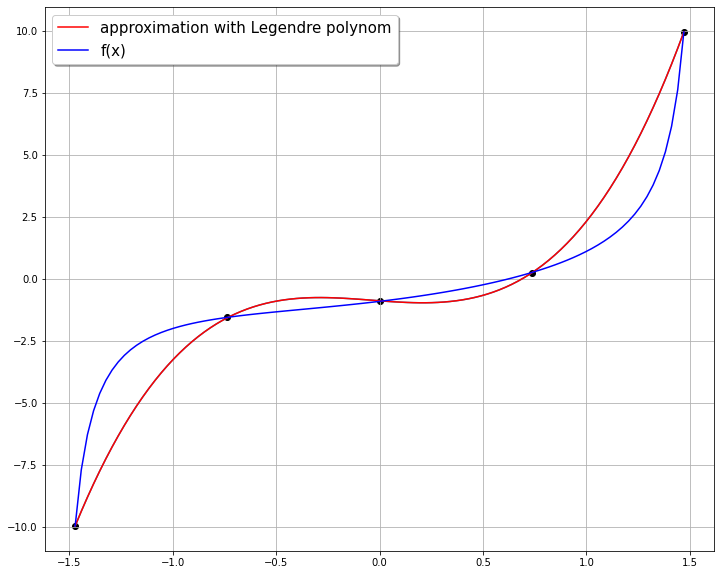

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_dots, polynomial_y)
ax.scatter(even_x, even_y, c = 'black')
ax.plot(x_dots, q_polynomial_y, c = 'r', label = 'approximation with Legendre polynom')
ax.plot(x_dots, y, c = 'blue', label = 'f(x)')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 10)